<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline

# fixing low matplot dpis on local runtime
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, LabelEncoder

# Turn off local tensorflow CUDA warning
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score,accuracy_score, recall_score

import random

## Loading the dataset

In [2]:
# load dataset
data = pd.read_csv("Churn.csv")

In [3]:
# let's copy to prevent changing and reloading
df = data.copy()
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Data Overview

In [4]:
# Checking the shape of the data
print(f'There is', df.shape[0], f'rows and', df.shape[1], f'columns')

There is 10000 rows and 14 columns


In [5]:
# printing a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- *The data frame contains numeric types and string/objects values without missing values.*
- *HasCrCard and IsActiveMember need to be turned into categorical variables.*

In [6]:
# let's keep origin ds from a side-effects
df2 = df.copy()
# let's turn HasCrCard and IsActiveMember into cat values
cat_vars = ['HasCrCard', 'IsActiveMember']
df2[cat_vars] = df2[cat_vars].astype('category')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  object  
 5   Gender           10000 non-null  object  
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  category
 11  IsActiveMember   10000 non-null  category
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7), object(3)
memory usage: 957.4+ KB


- *HasCrCard and IsActiveMember are categorical now.*

In [7]:
# Checking duplicate values
df2.duplicated().sum()

0

- *The dataframe does not contain duplicated values.*

- **RowNumber, CustomerId, Surname: They are a unique identifier for customers and can be dropped as it wouldn't add any information to our analysis.**

In [8]:
# dropping it
df2 = df2.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [9]:
# Checking for ununique values
for i in df2.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(df2[i].value_counts())
    print("*" * 50)

Unique values in Geography are :
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
Male      5457
Female    4543
Name: count, dtype: int64
**************************************************


* Most of the records are for existing customers.
* Most of the bank's customers are male
* Most customers are from France.

In [10]:
# checking statistical summary of the dataset for all categories
df2.describe().apply(lambda s: s.apply('{0:.1f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.5,96.7,350.0,584.0,652.0,718.0,850.0
Age,10000.0,38.9,10.5,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,5.0,2.9,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,76485.9,62397.4,0.0,0.0,97198.5,127644.2,250898.1
NumOfProducts,10000.0,1.5,0.6,1.0,1.0,1.0,2.0,4.0
EstimatedSalary,10000.0,100090.2,57510.5,11.6,51002.1,100193.9,149388.2,199992.5
Exited,10000.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0


#### Observations:
* Age: Average age of customers is 39 years, age of customers has a wide range from 18 to 92 years.
* Tenure: On average 5 years, number variation is from 0 to 10 years of the bank using.
* Balance: Average balance is 76486, min balance is 0, max is 250898.
* NumOfProductst: All customers use at least one purchased product of the bank, max number of purchased products is 4.
* EstimatedSalary: On average estimated salary of customers is 100090, min is 12, max 199993.
* Exited: Binary categorical variable, we will use it as the target to predict.

## Identifying a target value

- **Because Exited is a categorical variable that decides whether the customer left
the bank within six months or not it will be our target value for a neural-based network classifier.**

## <a name='link2'>Exploratory Data Analysis Quick observation</a>

#### **Note**: The EDA section covers the key observations from EDA. The detailed EDA can be found in the <a href = #link1>appendix section</a>.

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [11]:
# Using some utility functions to combine some plots for univariative analysis:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None, discrete=False):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter", discrete=discrete
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, discrete=discrete
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

# Function to plot distributions
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()



**Univariate analysis**

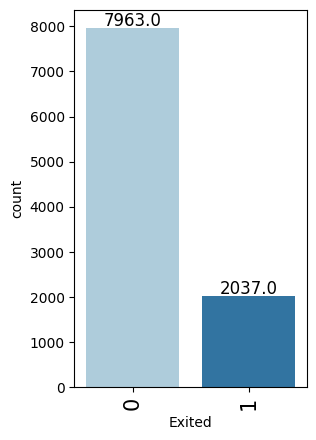

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [12]:
# Checking number of active accounts for target Exited variable
labeled_barplot(df2, 'Exited')
df2['Exited'].value_counts(normalize=True)

- *20% of customers are not active/exited and 80% of customers are active.*
- *The data is imbalanced*

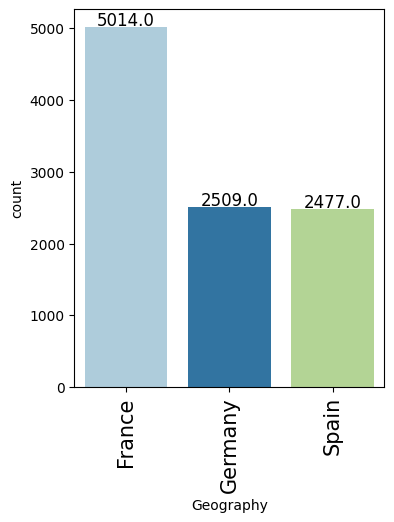

Geography
France     0.5014
Germany    0.2509
Spain      0.2477
Name: proportion, dtype: float64

In [13]:
# Checking the location of customers:
labeled_barplot(df2, 'Geography')
df2['Geography'].value_counts(normalize=True)

- *50% of the customers are from France, 25% from Germany, 25% from Spain.*

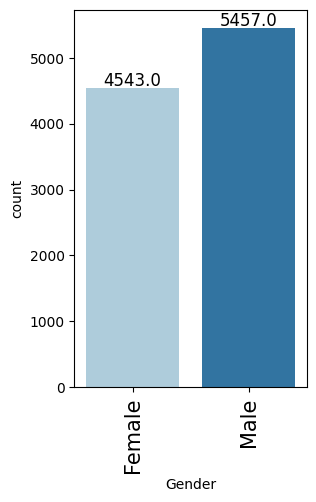

Gender
Male      0.5457
Female    0.4543
Name: proportion, dtype: float64

In [14]:
# Checking the customers' gender:
labeled_barplot(df2, 'Gender')
df2['Gender'].value_counts(normalize=True)

- *55% of the customers are male.*

### Bitivariate analysis

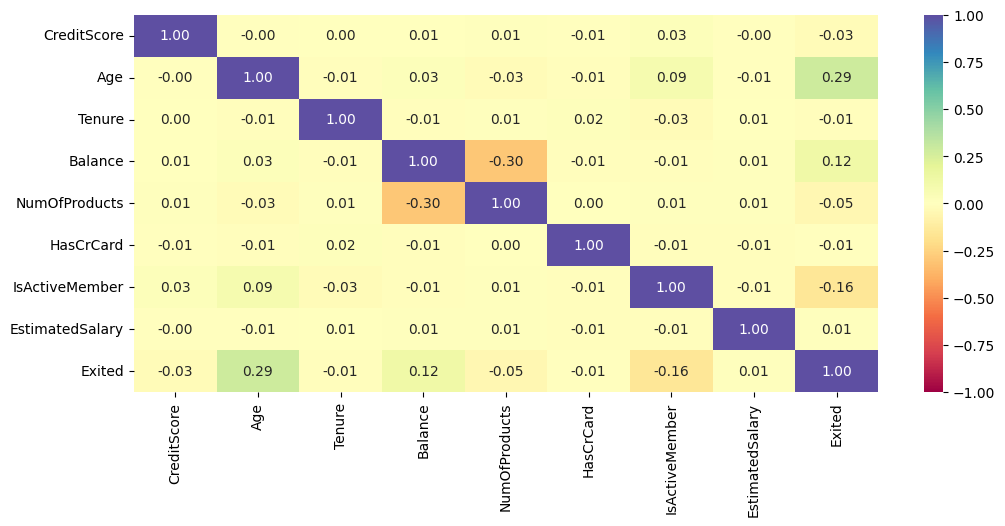

In [15]:
#let's check the correlation between all numeric variables
features_list = df2.select_dtypes(exclude='object')
plt.figure(figsize=(12, 5))
sns.heatmap(features_list.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- *The dataframe does not contain the expressed correlations.*
- *Age and Exited has the most correlation between them, but not strong.*

### To jump to the appendix with detaled EDA, please click <a href = #link1>here</a>.

## Data Preprocessing

### Train-validation-test Split

In [16]:
# let's copy the database for prevention of the side effect on "df2"
df3 = df2.copy()
# let's drop the target value
X = df3.drop(['Exited'],axis=1)
y = df3['Exited']

In [17]:
y.shape

(10000,)

In [18]:
# Splitting the dataset into the Training and Testing set
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y, shuffle=True)

In [19]:
# Splitting the training dataset into the Training and Validation set.
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.2, random_state = 42, stratify=y_temp, shuffle=True)

In [20]:
# Checking the shape of the X-split data
print(f'There is', X_train.shape, X_val.shape, X_test.shape, 'rows and columns.')

There is (6400, 10) (1600, 10) (2000, 10) rows and columns.


In [21]:
# Checking the shape of the y-split data
print(f'There is', y_train.shape, y_val.shape, y_test.shape, 'rows.')

There is (6400,) (1600,) (2000,) rows.


### Dummy Variable Creation

**Let's encode split datasets:**

In [22]:
# let's encode categorical variables by pandas get-dummies function
# define manually string columns
dummy_cols = ['Geography', 'Gender']
X_train = pd.get_dummies(X_train, columns=dummy_cols, drop_first=True, dtype=float) # for train
X_val = pd.get_dummies(X_val, columns=dummy_cols, drop_first=True, dtype=float) # for val
X_test = pd.get_dummies(X_test, columns=dummy_cols, drop_first=True, dtype=float) # for test set
print(X_train.shape, X_val.shape, X_test.shape)

(6400, 11) (1600, 11) (2000, 11)


In [23]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3006,747,45,1,114959.12,1,1,0,189362.39,0.0,0.0,0.0
5735,585,44,4,0.00,2,0,1,101728.46,0.0,1.0,0.0
5652,691,29,9,0.00,2,0,0,199635.93,0.0,0.0,0.0
26,756,36,2,136815.64,1,1,1,170041.95,1.0,0.0,1.0
3596,643,36,0,148159.71,1,0,0,55835.66,0.0,0.0,1.0


- *After encoding, the column number is expanded from 10 to 11.*

### Data Normalization

In [24]:
# let's define num of classes for Exited variable
num_classes = 1 # Exited/existing

**Let's check the scale of numeric variables**

In [25]:
X_train.select_dtypes(include=np.number)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3006,747,45,1,114959.12,1,189362.39,0.0,0.0,0.0
5735,585,44,4,0.00,2,101728.46,0.0,1.0,0.0
5652,691,29,9,0.00,2,199635.93,0.0,0.0,0.0
26,756,36,2,136815.64,1,170041.95,1.0,0.0,1.0
3596,643,36,0,148159.71,1,55835.66,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
3239,762,19,6,0.00,2,55500.17,0.0,1.0,0.0
413,693,41,9,181461.48,3,187929.43,1.0,0.0,0.0
5787,729,26,4,97268.10,2,39356.38,1.0,0.0,1.0
860,667,43,8,190227.46,1,97508.04,0.0,0.0,1.0


- *CreditScore, Age, Tenure, Balance,  EstimatedSalary, NumOfProducts have different scale and neef to be scaled*

**Because StandardScaler makes negative numbers they will be cut by ReLU activation function, therefore let's use MaxAbsScaler to get positive scaled numbers.**

In [26]:
# defining the list of columns to normalize
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary", "NumOfProducts"]

# creating an instance of the MaxAbsScaler
mac = MaxAbsScaler()

X_train[cols_list] = mac.fit_transform(X_train[cols_list]) # learn and transform on train data
X_val[cols_list] = mac.transform(X_val[cols_list]) # transform val data
X_test[cols_list] = mac.transform(X_test[cols_list]) # transform test data

In [27]:
# let's check scaled numbers
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3006,0.878824,0.489130,0.1,0.482236,0.25,1,0,0.946848,0.0,0.0,0.0
5735,0.688235,0.478261,0.4,0.000000,0.50,0,1,0.508661,0.0,1.0,0.0
5652,0.812941,0.315217,0.9,0.000000,0.50,0,0,0.998217,0.0,0.0,0.0
26,0.889412,0.391304,0.2,0.573921,0.25,1,1,0.850242,1.0,0.0,1.0
3596,0.756471,0.391304,0.0,0.621508,0.25,0,0,0.279189,0.0,0.0,1.0


- *Dataset contain scaled numerical numbers*

**For classification problem, there is no need of scaling the target variable.**

## Model Building

### Model Evaluation Criterion

- *Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months. leaving the bank is a True Positive to leave prediction, hence wrongly predicting a customer who leaves the bank but keeps using the bank is a False Positive. Customers who remained in the bank predicted a True Negative, and customers who predicted existing but going to leave the bank predicted a False Negative*

**Which case is more important?**

- *If a customer is wrongly predicted as leaving(FP) and remains a bank user, it does not affect losses related to reducing a customer's base.*
- *If a customer is wrongly predicted as remaining existing(FP) and in reality going to leave the bank it affects the losses related to reducing a customer's base.*

**What defines this loss?**

- *The bank will loose it's income with FN metric, therefore we will use the TP/(TP+FN) metric - Recall.*

### Utility functions

**Let's use a function for plotting the confusion matrix**

In [28]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Let's create some helper functions to reuse repetitive code:**

In [29]:
# let's use a function for clearing backend
def clear_backend()->None:
    #Clearing tf backend
    backend.clear_session()
    #Fixing the seed for random number generators so that we can ensure we receive the same output everytime
    np.random.seed(42)
    random.seed(42)
    tf.random.set_seed(42)

In [30]:
# let's use a function for the metric plotting
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

### Neural Network with SGD Optimizer

In [31]:
#clear backend before adding layers
clear_backend()

#Initializing the neural network
model_SGDopt = Sequential()
# Adding an input layer with 64 neurons and relu as an activation function to avoid gradient vanishing during backpropagation.
model_SGDopt.add(Dense(64,activation='relu', input_dim = X_train.shape[1]))
# Adding the hidden layer with 32 neurons and relu as activation function
model_SGDopt.add(Dense(32,activation='relu'))
# Adding the output layer with sigmoid activation function
model_SGDopt.add(Dense(num_classes,activation = 'sigmoid')) # for two classes

In [32]:
# check the model's summary
model_SGDopt.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# let's define optimizer
optimizer = keras.optimizers.SGD(learning_rate=0.001)

# using recall
metric = keras.metrics.Recall()

# compile the model for bunary classification
model_SGDopt.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=optimizer, metrics=[metric])

In [34]:
# fitting the model with batch size 128 and 75 epochs
history_SGDopt = model_SGDopt.fit(X_train, y_train, batch_size=128, validation_data=(X_val, y_val), epochs=75, verbose=0)

**Let's plot Loss function:**

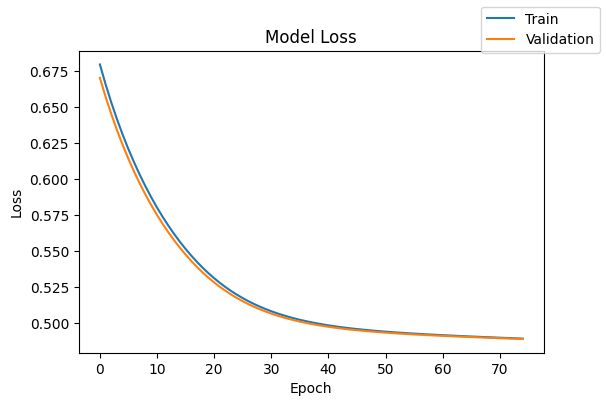

In [35]:
#Plotting Train Loss vs Validation Loss
plot(history_SGDopt, 'loss')

**recall:**

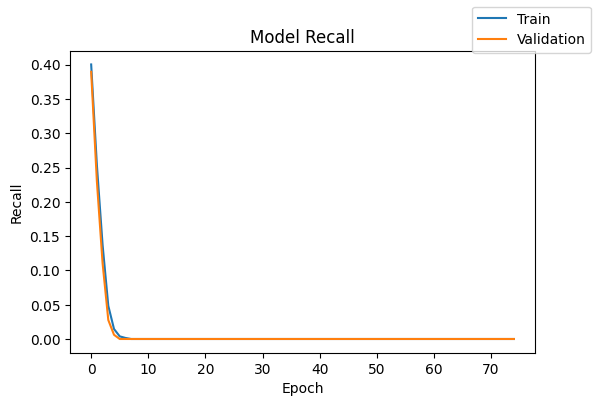

In [36]:
#Plotting Train recall vs Validation recall
plot(history_SGDopt, 'recall')

**Predicting the result:**

In [37]:
# Predicting the results using best as a threshold on train target data
y_train_pred = model_SGDopt.predict(X_train)
# using standard threshold 0.5:
y_train_pred = (y_train_pred > 0.5)

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [38]:
# Predicting the results using best as a threshold on validation target data
y_val_pred = model_SGDopt.predict(X_val)
# using standard threshold 0.5:
y_val_pred = (y_val_pred > 0.5)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


**Perfomance report**

- **Let's create two blank dataframes that will store the recall values for all the models we build:**

In [39]:
# creating the dataframes
train_metric_df = pd.DataFrame(columns=["recall on train"])
valid_metric_df = pd.DataFrame(columns=["recall on valid"])

In [40]:
model_name = "NN with SGD"

# Saving the result in train dataframe
train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred.round(), average='weighted')  # round predicted values to sci-kit learn can perform a binary evaluation
# Saving the result in valid dataframe
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred.round(), average='weighted') # round predicted values to sci-kit learn can perform a binary evaluation

In [41]:
# recall report for train data
print("Train set:")
train_metric_df.loc[model_name]

Train set:


recall on train    0.79625
Name: NN with SGD, dtype: float64

In [42]:
# recall report for validation data
print("Validation set:")
valid_metric_df.loc[model_name]

Validation set:


recall on valid    0.79625
Name: NN with SGD, dtype: float64

**Confusion matrix**

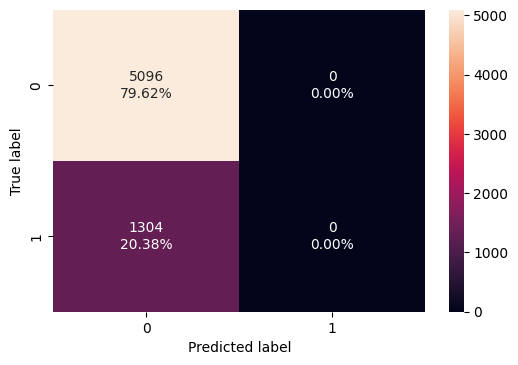

In [43]:
# confusion matrix for train data
make_confusion_matrix(y_train, y_train_pred) # round predicted values to sci-kit learn can perform a binary evaluation

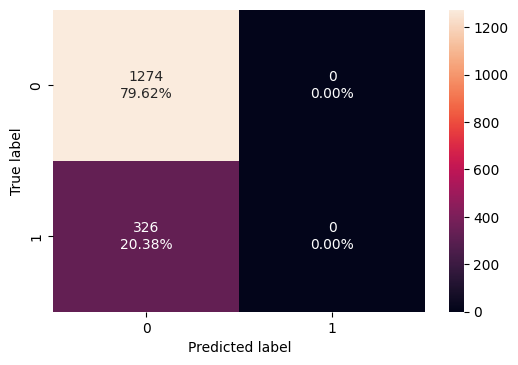

In [44]:
# confusion matrix for validation data
make_confusion_matrix(y_val, y_val_pred.round()) # round predicted values to sci-kit learn can perform a binary evaluation

- *SGD optimizer performs zero performance on the dataset, let's improve the model with the same NN architecture.*

## Model Performance Improvement

### Neural Network with Adam Optimizer

**Let's create a similar sequential to the previous Dense neural network:**

In [45]:
#clear backend before adding layers
clear_backend()

#Initializing the neural network
model_Adam = Sequential()
# Adding an input layer with 64 neurons and the relu activation function
model_Adam.add(Dense(64,activation='relu', input_dim = X_train.shape[1]))
# Adding the hidden layer with 32 neurons and the relu activation function
model_Adam.add(Dense(32,activation='relu',))
# Adding the output layer with the sigmoid activation function
model_Adam.add(Dense(num_classes,activation = 'sigmoid')) # for two classes

In [46]:
# let's define optimizer
optimizer = keras.optimizers.Adam() #learning rate is 0.001

# using recall
metric = keras.metrics.Recall()

# compile the model for bunary classification
model_Adam.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=optimizer, metrics=[metric])

In [47]:
# check the model's summary
model_Adam.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# fitting the model with batch size 128 and 120 epochs
history_Adamopt = model_Adam.fit(X_train, y_train, batch_size=128, validation_data=(X_val, y_val), epochs=120, verbose=0)

**Let's plot Loss function:**

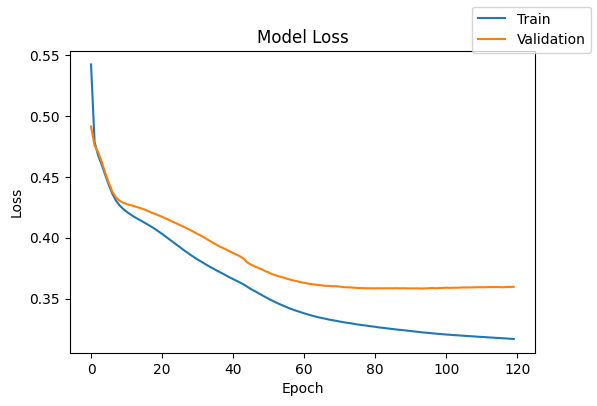

In [49]:
#Plotting Train Loss vs Validation Loss
plot(history_Adamopt, 'loss')

**Recall:**

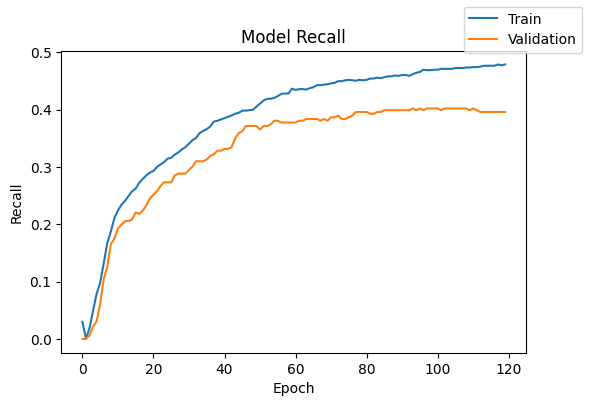

In [50]:
#Plotting Train recall vs Validation recall
plot(history_Adamopt, 'recall')

**Predicting the result:**

In [51]:
# Predicting the results using best as a threshold on train target data
y_train_pred = model_Adam.predict(X_train)
# using standard threshold 0.5:
y_train_pred = (y_train_pred > 0.5)

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [52]:
# Predicting the results using best as a threshold on validation target data
y_val_pred = model_Adam.predict(X_val)
# using standard threshold 0.5:
y_val_pred = (y_val_pred > 0.5)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


**Perfomance report**

- *Let's put metric result to the dataframes that store the recall values for all the models we build:*

In [53]:
model_name = "NN with Adam"

# Saving the result in train dataframe
train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred.round(), average='weighted') # round predicted values to sci-kit learn can perform a binary evaluation
# Saving the result in valid dataframe
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred.round(), average='weighted') # round predicted values to sci-kit learn can perform a binary evaluation

In [54]:
# recall report for train data
print("Train set:")
train_metric_df.loc[model_name]

Train set:


recall on train    0.869375
Name: NN with Adam, dtype: float64

In [55]:
# recall report for validation data
print("Validation set:")
valid_metric_df.loc[model_name]

Validation set:


recall on valid    0.85
Name: NN with Adam, dtype: float64

**Confusion matrix**

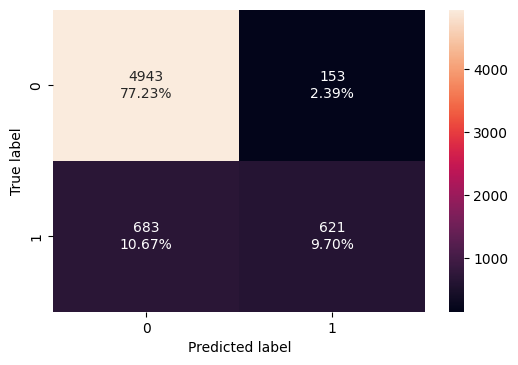

In [56]:
# confusion matrix for train data
make_confusion_matrix(y_train, y_train_pred.round()) # round predicted values to sci-kit learn can perform a binary evaluation

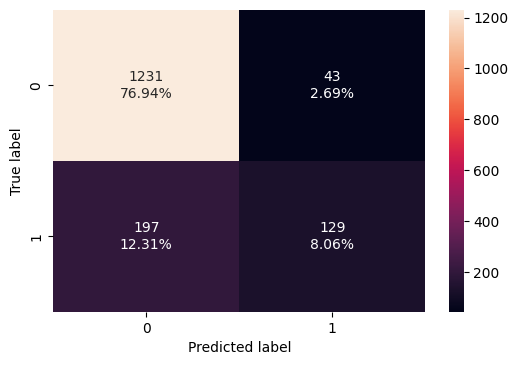

In [57]:
# confusion matrix for validation data
make_confusion_matrix(y_val, y_val_pred.round()) # round predicted values to sci-kit learn can perform a binary evaluation

- *Using the Adam optimizer provides better data set performance than SGD, with some divergence between training and validation data, but the model still has poor performance. The model needs further improvement.*

### Neural Network with Adam and Batch normalization

In [58]:
#clear backend before adding layers
clear_backend()

#Initializing the neural network
model_Adamopt_Batch = Sequential()
# Adding an input layer with 64 neurons and the relu activation function
model_Adamopt_Batch.add(Dense(64,activation='relu', input_dim = X_train.shape[1]))
model_Adamopt_Batch.add(BatchNormalization())
# Adding the hidden layer with 32 neurons and the relu activation function
model_Adamopt_Batch.add(Dense(32,activation='relu'))
model_Adamopt_Batch.add(BatchNormalization())
# Adding the output layer with the sigmoid activation function
model_Adamopt_Batch.add(Dense(num_classes,activation = 'sigmoid')) # for two classes

In [59]:
# check the model's summary
model_Adamopt_Batch.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 192 (768.00 B)

In [60]:
# let's define optimizer
optimizer = keras.optimizers.Adam() # defining Adam as the optimizer to be used with the learning rate is 0.001

# using recall
metric = keras.metrics.Recall()

# compile the model for bunary classification
model_Adamopt_Batch.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=optimizer, metrics=[metric])

In [61]:
# fitting the model with batch size 128 and 100 epochs
history_Adamopt_Batch = model_Adamopt_Batch.fit(X_train, y_train, batch_size=128, validation_data=(X_val, y_val), epochs=100, verbose=0)

**Let's plot Loss function:**

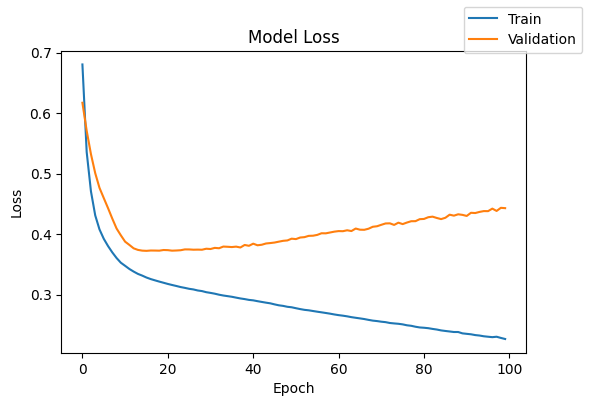

In [62]:
#Plotting Train Loss vs Validation Loss
plot(history_Adamopt_Batch, 'loss')

**recall:**

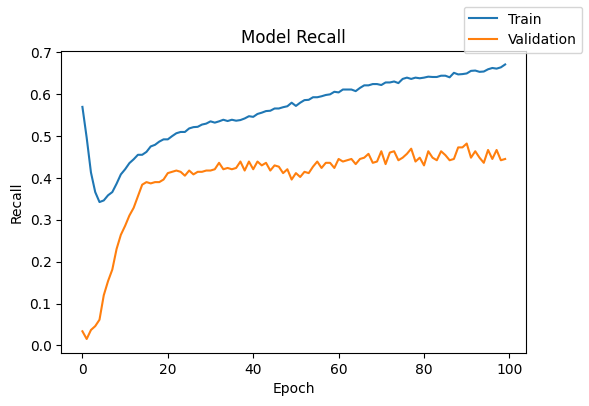

In [63]:
#Plotting Train recall vs Validation recall
plot(history_Adamopt_Batch, 'recall')

**Predicting the result:**

In [64]:
# Predicting the results using best as a threshold on train target data
y_train_pred = model_Adamopt_Batch.predict(X_train)
# using standard threshold 0.5:
y_train_pred = (y_train_pred > 0.5)

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [65]:
# Predicting the results using best as a threshold on validation target data
y_val_pred = model_Adamopt_Batch.predict(X_val)
# using standard threshold 0.5:
y_val_pred = (y_val_pred > 0.5)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


**Perfomance report**

- *Let's put metric result to the dataframes that store the recall values for all the models we build:*

In [66]:
model_name = "NN with Adam & Batch normalization"

# Saving the result in train dataframe
train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred.round(), average='weighted')  # round predicted values to sci-kit learn can perform a binary evaluation
# Saving the result in valid dataframe
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred.round(), average='weighted') # round predicted values to sci-kit learn can perform a binary evaluation

In [67]:
# recall report for train data
print("Train set:")
train_metric_df.loc[model_name]

Train set:


recall on train    0.89
Name: NN with Adam & Batch normalization, dtype: float64

In [68]:
# recall report for validation data
print("Validation set:")
valid_metric_df.loc[model_name]

Validation set:


recall on valid    0.8375
Name: NN with Adam & Batch normalization, dtype: float64

**Confusion matrix**

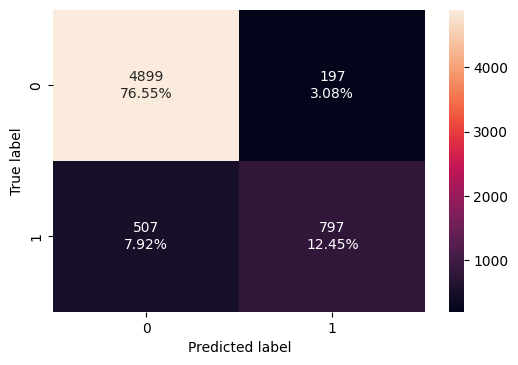

In [69]:
# confusion matrix for train data
make_confusion_matrix(y_train, y_train_pred) # round predicted values to sci-kit learn can perform a binary evaluation

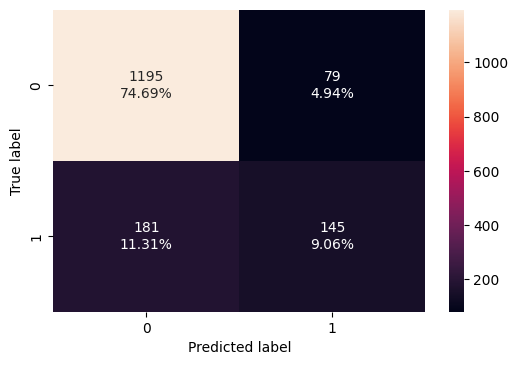

In [70]:
# confusion matrix for validation data
make_confusion_matrix(y_val, y_val_pred.round()) # round predicted values to sci-kit learn can perform a binary evaluation

- *Adam optimizer with BatchNormalization performs poor performance with devergence on the dataset, let's improve the model with the same NN architecture.*

### Neural Network with Adam Optimizer and Dropout

**Let's create a similar sequential to the previous Dense neural network with Dropout layers:**

- *Let's initialize the weights using He normal.*

In [71]:
#clear backend before adding layers
clear_backend()

#Initializing the neural network
model_Adam_Dropout = Sequential()
# Adding an input layer with 64 neurons and the relu activation function
model_Adam_Dropout.add(Dense(64,activation='relu', kernel_initializer="he_normal", input_dim = X_train.shape[1]))
# Adding dropout with ratio 0.2
model_Adam_Dropout.add(Dropout(0.2))
# Adding the hidden layer with 32 neurons and the relu activation function
model_Adam_Dropout.add(Dense(32,activation='relu', kernel_initializer="he_normal"))
# Adding dropout with ratio 0.1
model_Adam_Dropout.add(Dropout(0.1))
# Adding the output layer with the sigmoid activation function
model_Adam_Dropout.add(Dense(num_classes,activation = 'sigmoid')) # for two classes

In [72]:
# let's define optimizer
optimizer = keras.optimizers.Adam() #learning rate is 0.001

# using recall
metric = keras.metrics.Recall()

# compile the model for bunary classification
model_Adam_Dropout.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=optimizer, metrics=[metric])

In [73]:
# check the model's summary
model_Adam_Dropout.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
# # fitting the model with batch size 64 and 100 epochs
history_Adam_Dropout = model_Adam_Dropout.fit(X_train, y_train, batch_size=64, validation_data=(X_val, y_val), epochs=100, verbose=0)

**Let's plot Loss function:**

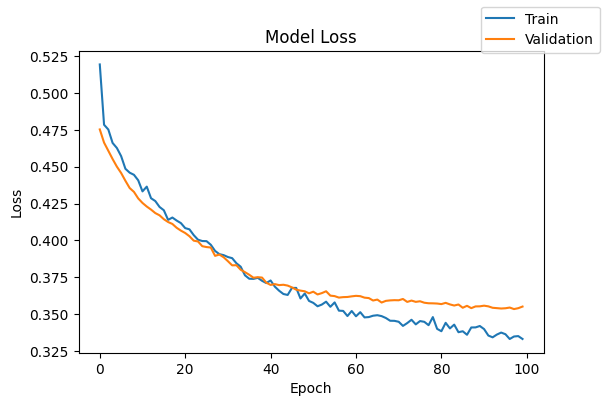

In [75]:
#Plotting Train Loss vs Validation Loss
plot(history_Adam_Dropout, 'loss')

**Recall:**

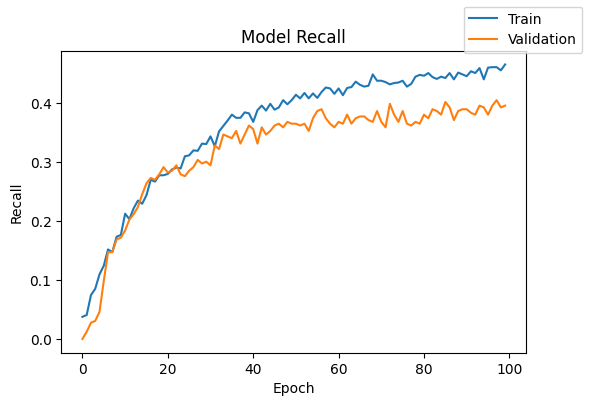

In [76]:
#Plotting Train recall vs Validation recall
plot(history_Adam_Dropout, 'recall')

**Predicting the result:**

In [77]:
# Predicting the results using best as a threshold on train target data
y_train_pred = model_Adam_Dropout.predict(X_train)
# using standard threshold 0.5:
y_train_pred = (y_train_pred > 0.5)

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [78]:
# Predicting the results using best as a threshold on validation target data
y_val_pred = model_Adam_Dropout.predict(X_val)
# using standard threshold 0.5:
y_val_pred = (y_val_pred > 0.5)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


**Perfomance report**

- *Let's put metric result to the dataframes that store the recall values for all the models we build:*

In [79]:
model_name = "NN with Adam & Dropout"

# Saving the result in train dataframe
train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred.round(), average='weighted') # round predicted values to sci-kit learn can perform a binary evaluation
# Saving the result in valid dataframe
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred.round(), average='weighted') # round predicted values to sci-kit learn can perform a binary evaluation

In [80]:
# recall report for train data
print("Train set:")
train_metric_df.loc[model_name]

Train set:


recall on train    0.871563
Name: NN with Adam & Dropout, dtype: float64

In [81]:
# recall report for validation data
print("Validation set:")
valid_metric_df.loc[model_name]

Validation set:


recall on valid    0.850625
Name: NN with Adam & Dropout, dtype: float64

**Confusion matrix**

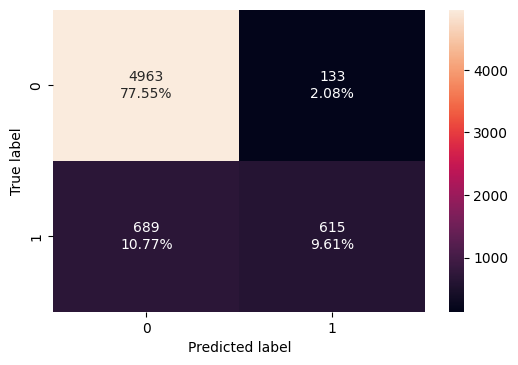

In [82]:
# confusion matrix for train data
make_confusion_matrix(y_train, y_train_pred.round()) # round predicted values to sci-kit learn can perform a binary evaluation

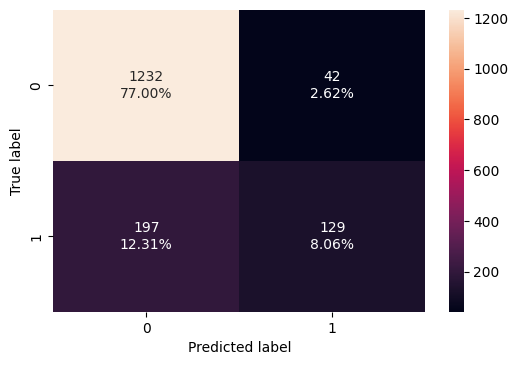

In [83]:
# confusion matrix for validation data
make_confusion_matrix(y_val, y_val_pred.round()) # round predicted values to sci-kit learn can perform a binary evaluation

- *Using the Adam optimizer with Droput provides better data set performance than using Adam on the same simple NN, but the model still has poor performance. The plot shows some noise. The model needs further improvement.*
- *The data looks imbalanced even after scaling, let's improve it in next.*

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [84]:
# initializing SMOTE instance
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=42)

# fitting SMOTE on training data
X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



**Let's create a similar sequential to the previous Dense neural network:**

In [85]:
#clear backend before adding layers
clear_backend()

#Initializing the neural network
model_SGD_SMOTE = Sequential()
# Adding an input layer with 64 neurons and the relu activation function
model_SGD_SMOTE.add(Dense(64,activation='relu', input_dim = X_train_smote.shape[1]))
# Adding the hidden layer with 32 neurons and the relu activation function
model_SGD_SMOTE.add(Dense(32,activation='relu'))
# Adding the output layer with the sigmoid activation function
model_SGD_SMOTE.add(Dense(num_classes,activation = 'sigmoid')) # for two classes

In [86]:
# let's define optimizer
optimizer = keras.optimizers.SGD(0.001) #learning rate is 0.001

# using recall
metric = keras.metrics.Recall()

# compile the model for bunary classification
model_SGD_SMOTE.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=optimizer, metrics=[metric])

In [87]:
# check the model's summary
model_SGD_SMOTE.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
# fitting the model with batch size 64 and 100 epochs
history_SGD_SMOTE = model_SGD_SMOTE.fit(X_train_smote, y_train_smote, batch_size=64, validation_data=(X_val, y_val), epochs=100, verbose=0)

**Let's plot Loss function:**

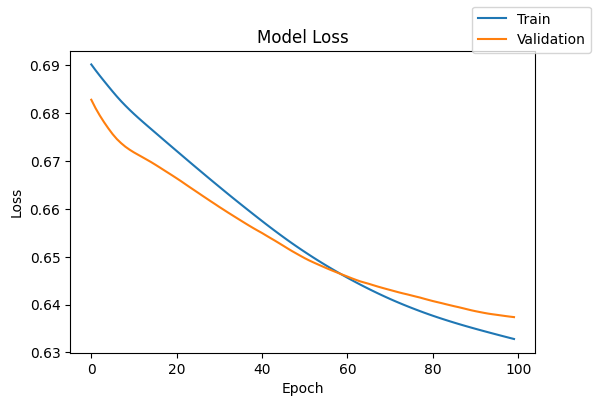

In [89]:
#Plotting Train Loss vs Validation Loss
plot(history_SGD_SMOTE, 'loss')

**Recall:**

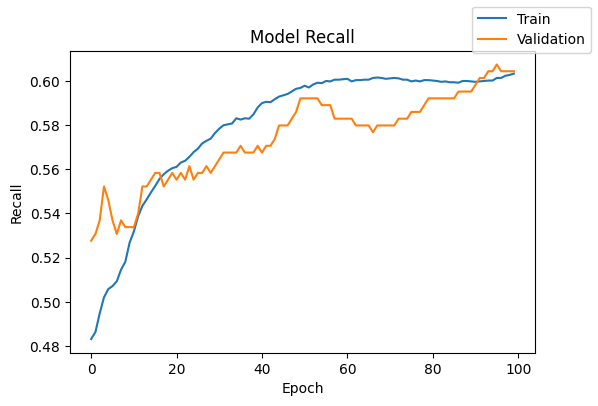

In [90]:
#Plotting Train recall vs Validation recall
plot(history_SGD_SMOTE, 'recall')

**Predicting the result:**

In [91]:
# Predicting the results using best as a threshold on train target data
y_train_pred = model_SGD_SMOTE.predict(X_train_smote)
# using standard threshold 0.5:
y_train_pred = (y_train_pred > 0.5)

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [92]:
# Predicting the results using best as a threshold on validation target data
y_val_pred = model_SGD_SMOTE.predict(X_val)
# using standard threshold 0.5:
y_val_pred = (y_val_pred > 0.5)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


**Perfomance report**

- *Let's put metric resul to the dataframes that store the recall values for all the models we build:*

In [93]:
model_name = "NN with SMOTE & SGD"

# Saving the result in train dataframe
train_metric_df.loc[model_name] = recall_score(y_train_smote, y_train_pred.round(), average='weighted') # round predicted values to sci-kit learn can perform a binary evaluation
# Saving the result in valid dataframe
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred.round(), average='weighted') # round predicted values to sci-kit learn can perform a binary evaluation

In [94]:
# recall report for train data
print("Train set:")
train_metric_df.loc[model_name]

Train set:


recall on train    0.639423
Name: NN with SMOTE & SGD, dtype: float64

In [95]:
# recall report for validation data
print("Validation set:")
valid_metric_df.loc[model_name]

Validation set:


recall on valid    0.653125
Name: NN with SMOTE & SGD, dtype: float64

**Confusion matrix**

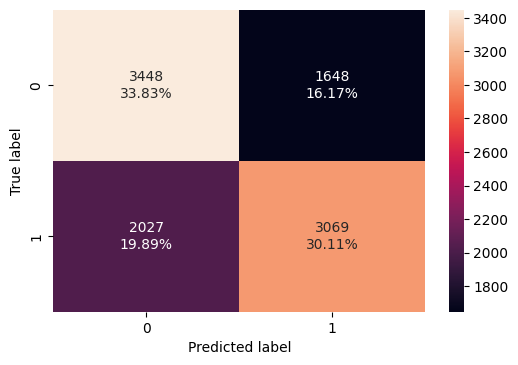

In [96]:
# confusion matrix for train data
make_confusion_matrix(y_train_smote, y_train_pred.round()) # round predicted values to sci-kit learn can perform a binary evaluation

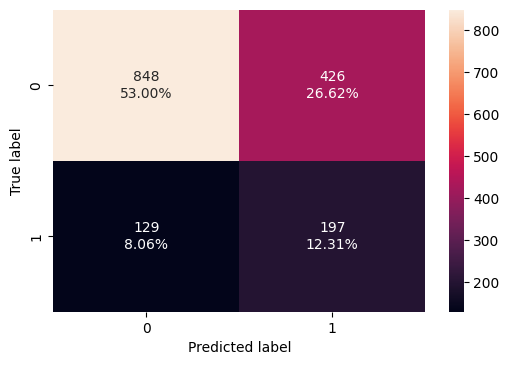

In [97]:
# confusion matrix for validation data
make_confusion_matrix(y_val, y_val_pred.round()) # round predicted values to sci-kit learn can perform a binary evaluation

- *Using SMOTE with SGD model performs better than previous models, but it's not enough.*
- *The losses show that main reason low performance is imbalance of the data, let's improve it in next:.*

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

**Let's create a similar sequential to the previous Dense neural network:**

In [98]:
#clear backend before adding layers
clear_backend()

#Initializing the neural network
model_Adam_SMOTE = Sequential()
# Adding an input layer with 64 neurons and the relu activation function
model_Adam_SMOTE.add(Dense(64,activation='relu', input_dim = X_train_smote.shape[1]))
# Adding the hidden layer with 32 neurons and the relu activation function
model_Adam_SMOTE.add(Dense(32,activation='relu'))
# Adding the output layer with the sigmoid activation function
model_Adam_SMOTE.add(Dense(num_classes,activation = 'sigmoid')) # for two classes

In [99]:
# let's define optimizer
optimizer = keras.optimizers.Adam() #learning rate is 0.001

# using recall
metric = keras.metrics.Recall()

# compile the model for bunary classification
model_Adam_SMOTE.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=optimizer, metrics=[metric])

In [100]:
# check the model's summary
model_Adam.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,645 (33.77 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,764 (22.52 KB)

In [101]:
# fitting the model with batch size 128 and 75 epochs
history_Adamopt_SMOTE = model_Adam_SMOTE.fit(X_train_smote, y_train_smote, batch_size=128, validation_data=(X_val, y_val), epochs=75, verbose=0)

**Let's plot Loss function:**

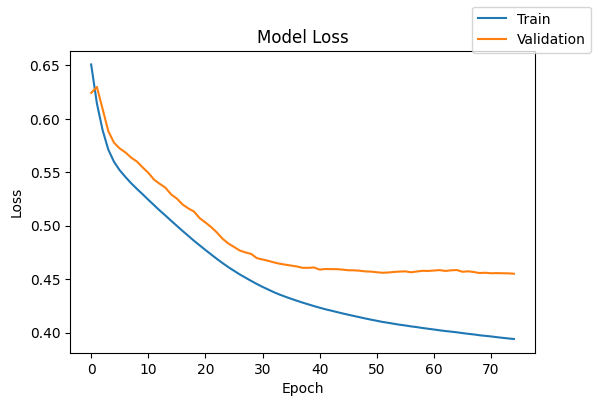

In [102]:
#Plotting Train Loss vs Validation Loss
plot(history_Adamopt_SMOTE, 'loss')

**Recall:**

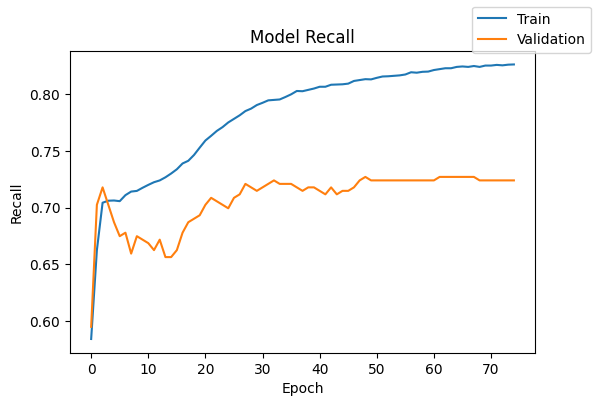

In [103]:
#Plotting Train recall vs Validation recall
plot(history_Adamopt_SMOTE,'recall')

**Predicting the result:**

In [104]:
# Predicting the results using best as a threshold on train target data
y_train_pred = model_Adam_SMOTE.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [105]:
# Predicting the results using best as a threshold on validation target data
y_val_pred = model_Adam_SMOTE.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


**Perfomance report**

- *Let's put metric resul to the dataframes that store the recall values for all the models we build:*

In [106]:
model_name = "NN with Adam & SMOTE"

# Saving the result in train dataframe
train_metric_df.loc[model_name] = recall_score(y_train_smote, y_train_pred.round(), average='weighted') # round predicted values to sci-kit learn can perform a binary evaluation
# Saving the result in valid dataframe
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred.round(), average='weighted') # round predicted values to sci-kit learn can perform a binary evaluation

In [107]:
# recall report for train data
print("Train set:")
train_metric_df.loc[model_name]

Train set:


recall on train    0.825844
Name: NN with Adam & SMOTE, dtype: float64

In [108]:
# recall report for validation data
print("Validation set:")
valid_metric_df.loc[model_name]

Validation set:


recall on valid    0.7925
Name: NN with Adam & SMOTE, dtype: float64

**Confusion matrix**

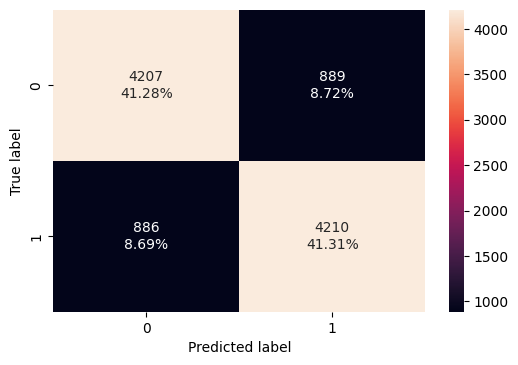

In [109]:
# confusion matrix for train data
make_confusion_matrix(y_train_smote, y_train_pred.round()) # round predicted values to sci-kit learn can perform a binary evaluation

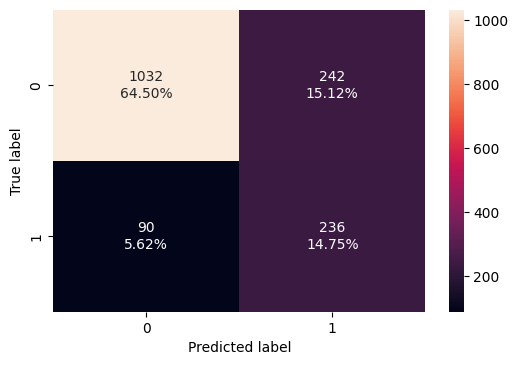

In [110]:
# confusion matrix for validation data
make_confusion_matrix(y_val, y_val_pred.round()) # round predicted values to sci-kit learn can perform a binary evaluation

- *Using the Adam optimizer with SMOTE provides better data set performance than SGD with SMOTE but with noisy validation performance and Recall divergence between training and validation sets. The model needs further improvement.*

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

**Let's create a similar sequential to the previous Dense neural network with Dropout layers:**

In [111]:
#clear backend before adding layers
clear_backend()

#Initializing the neural network
model_Adamopt_SMOTE_Drop = Sequential()
# Adding an input layer with 64 neurons and the relu activation function.
model_Adamopt_SMOTE_Drop.add(Dense(64,activation='relu', input_dim = X_train.shape[1]))
# Adding dropout with ratio 0.4
model_Adamopt_SMOTE_Drop.add(Dropout(0.4))
# Adding the hidden layer with 32 neurons and relu as activation function
model_Adamopt_SMOTE_Drop.add(Dense(32,activation='relu'))
# Adding dropout with ratio 0.2
model_Adamopt_SMOTE_Drop.add(Dropout(0.2))
# Adding the output layer with sigmoid activation function
model_Adamopt_SMOTE_Drop.add(Dense(num_classes,activation = 'sigmoid')) # for two classes

In [112]:
# let's define optimizer
optimizer = keras.optimizers.Adam(0.001) #learning rate is 0.001

# using recall
metric = keras.metrics.Recall()

# compile the model for bunary classification
model_Adamopt_SMOTE_Drop.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=optimizer, metrics=[metric])

In [113]:
# check the model's summary
model_Adamopt_SMOTE_Drop.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
# fitting the model with batch size 128 and 50 epochs
history_Adamopt_SMOTE_Drop = model_Adamopt_SMOTE_Drop.fit(X_train_smote, y_train_smote, batch_size=128, validation_data=(X_val, y_val), epochs=50, verbose=0)

**Let's plot Loss function:**

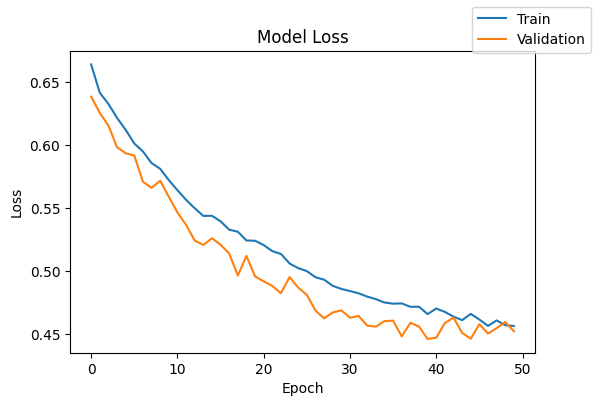

In [115]:
#Plotting Train Loss vs Validation Loss
plot(history_Adamopt_SMOTE_Drop, 'loss')

**Recall:**

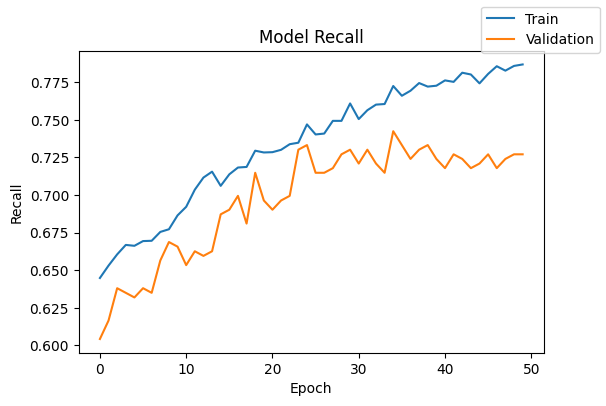

In [116]:
#Plotting Train recall vs Validation recall
plot(history_Adamopt_SMOTE_Drop, 'recall')

**Predicting the result:**

In [117]:
# Predicting the results using best as a threshold on train target data
y_train_pred = model_Adamopt_SMOTE_Drop.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [118]:
# Predicting the results using best as a threshold on validation target data
y_val_pred = model_Adamopt_SMOTE_Drop.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


**Perfomance report**

- *Let's put metric result to the dataframes that store the recall values for all the models we build:*

In [119]:
model_name = "NN with SMOTE & Adam & Dropout"

# Saving the result in train dataframe
train_metric_df.loc[model_name] = recall_score(y_train_smote, y_train_pred.round(), average='weighted') # round predicted values to sci-kit learn can perform a binary evaluation
# Saving the result in valid dataframe
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred.round(), average='weighted') # round predicted values to sci-kit learn can perform a binary evaluation

In [120]:
# recall report for train data
print("Train set:")
train_metric_df.loc[model_name]

Train set:


recall on train    0.803081
Name: NN with SMOTE & Adam & Dropout, dtype: float64

In [121]:
# recall report for validation data
print("Validation set:")
valid_metric_df.loc[model_name]

Validation set:


recall on valid    0.7875
Name: NN with SMOTE & Adam & Dropout, dtype: float64

**Confusion matrix**

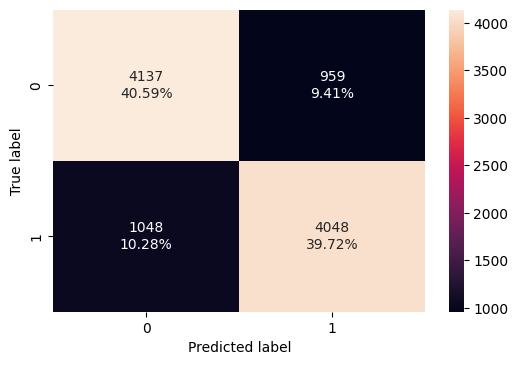

In [122]:
# confusion matrix for train data
make_confusion_matrix(y_train_smote, y_train_pred.round()) # round predicted values to sci-kit learn can perform a binary evaluation

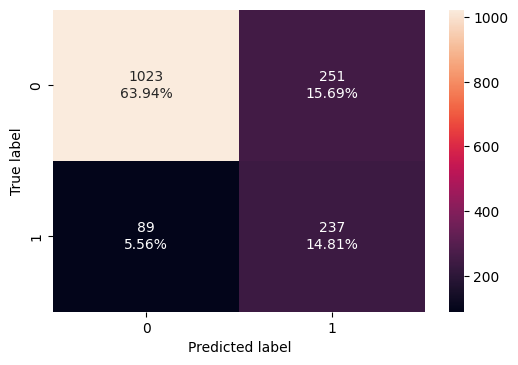

In [123]:
# confusion matrix for validation data
make_confusion_matrix(y_val, y_val_pred.round()) # round predicted values to sci-kit learn can perform a binary evaluation

- *Using the SMOTE model performs better than previous models but with noisy validation performance and Recall divergence between training and validation sets.*

## Model Performance Comparison and Final Model Selection

**Let's retrieve metric dataframes :**

In [124]:
# concat train and valid metric
result = pd.concat([train_metric_df, valid_metric_df], axis=1).reindex(train_metric_df.index)
# add difference between recals on train and validation sets
result['difference'] = result['recall on train'] - result['recall on valid']

In [125]:
print("Models performance comparison")
result

Models performance comparison


,recall on train,recall on valid,difference
NN with SGD,0.796250,0.796250,0.000000
NN with Adam,0.869375,0.850000,0.019375
NN with Adam & Batch normalization,0.890000,0.837500,0.052500
NN with Adam & Dropout,0.871563,0.850625,0.020938
NN with SMOTE & SGD,0.639423,0.653125,-0.013702
NN with Adam & SMOTE,0.825844,0.792500,0.033344
NN with SMOTE & Adam & Dropout,0.803081,0.787500,0.015581


- *For each model were chosen the different variations batch_size=[64,128], Dropout[0.1, 0.2, 0.4], and epochs=[50,75,100] for better performance on each iteration.*
- *For Adam Optimizer and Dropout model was chosen  kernel_initializer="he_normal" because it makes smoother performance(less noise plots).*
- **NN with SMOTE&Adam&Dropout has better generalised performance, so let's consider it as the best model.**

## Actionable Insights and Business Recommendations

* We have been able to build a predictive model that bank can deploy this model to identify customers who are at risk of exiting and can use to find the key causes that drive the exiting and retention of customers.

**To improve customer retention based on the provided data, we can employ various strategies leveraging the available features:**
- *Use customer demographics (age, gender and geographic location) to tailor marketing campaigns and offers to suit their preferences and needs.*
- *Segment customers based on their credit score and financial behavior to provide targeted financial advice and product recommendations.*
- *Analyze customer tenure to identify long-standing relationships and provide special rewards or loyalty benefits to encourage further engagement.*
- *Evaluate the impact of having a credit card (HasCrCard) on customer churn and develop strategies to enhance the value of credit card offerings or offer additional benefits to cardholders.*
- *Identify inactive members (isActiveMembers) and implementinitiatives such as personalized notifications, rewards or incentives to encourage them to become more active and participate in the bank's services.*
- *Implement mechanisms for collecting feedback from customers regarding their banking experience, level of satisfaction and reasons for potential churn.*
- *Actively listen to customer feedback and use what you learn to consistently improve products, services and overall customer satisfaction.
  
**By using these strategies the bank can take proactive measures to enhance customer retention and reduce churn rates within its customer base.**

## <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

### Univariate analysis

**Let's check some categorical distribution summaries**

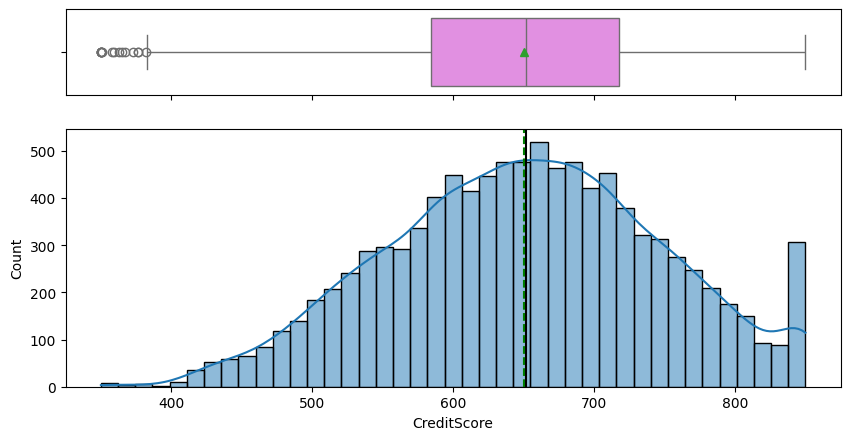

In [126]:
# Checking the distribution of 'CreditScore' column:
histogram_boxplot(df2, 'CreditScore', figsize=(10,5), kde = True)

- *The distribution is left-skewed with some otliers - when the credit score is less than 400.*
- *The average credit score is 650 with the spike on 870, ~350 clients have max credit score.*

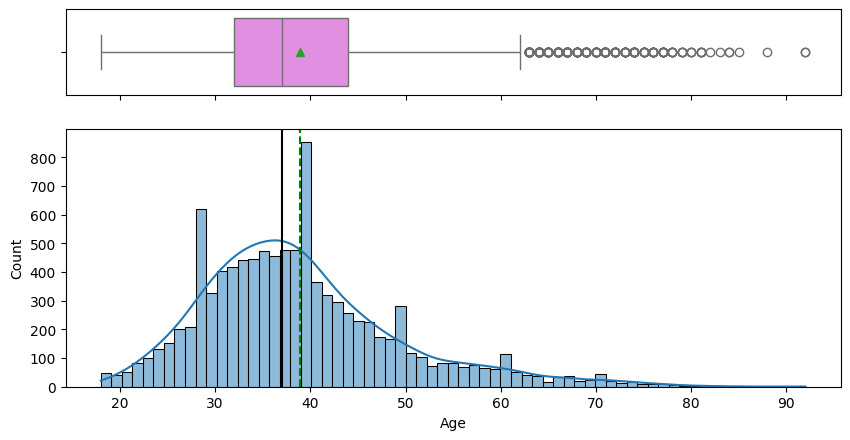

In [127]:
# Checking the distribution of'Customer_Age' column:
histogram_boxplot(df2, 'Age', figsize=(10,5), kde = True)

- *Averaged age of the customers is 39 years.*
- *The distribution is right-skewed with spikes on average between 39 and 28 years with outliers between 60 and 90 years.*

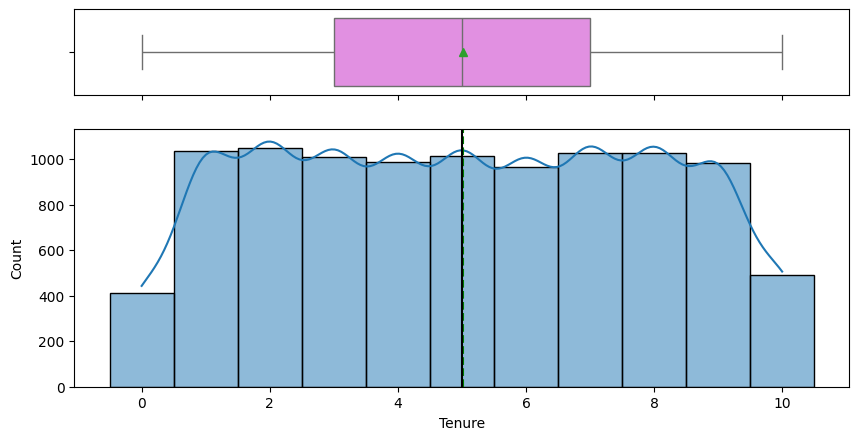

In [128]:
# Checking the distribution of period of relationship with the bank:
histogram_boxplot(df2,'Tenure', figsize=(10,5), kde=True, discrete=True)

- *The average period of the relationship is 5 months, the distribution is uniform.*

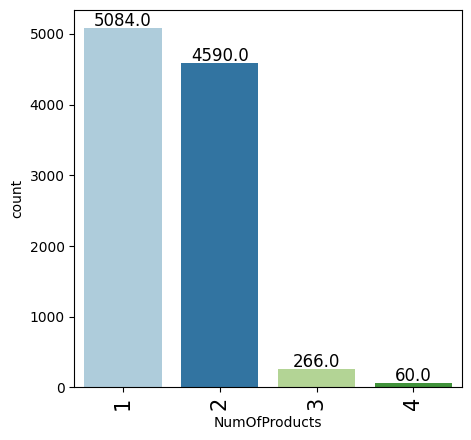

NumOfProducts
1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: proportion, dtype: float64

In [129]:
# Checking the  the number of products that a customer has purchased through the bank:
labeled_barplot(df2, 'NumOfProducts')
df2['NumOfProducts'].value_counts(normalize=True)

- *The most of customers has 1 or 2 numbers of the bank products.*

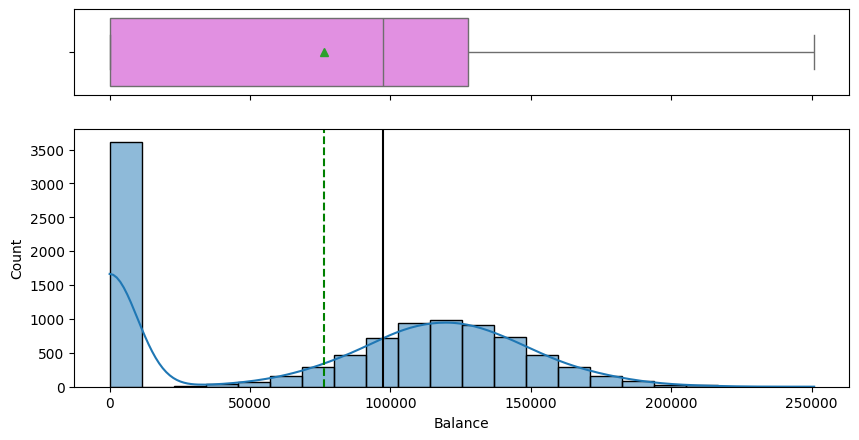

In [130]:
# Checking the Account balance:
histogram_boxplot(df2,'Balance', figsize=(10,5), discrete=False, kde=True)

- *The 3500 customers has zero account balance.*
- *The account balance distribution is normal and symmetric with an average value of 76500 units of currency.*

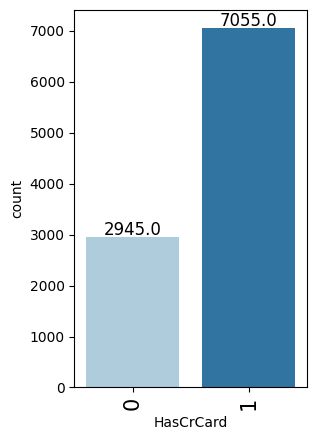

HasCrCard
1    0.7055
0    0.2945
Name: proportion, dtype: float64

In [131]:
# Checking the  the number of the customer have a credit card or not:
labeled_barplot(df2, 'HasCrCard')
df2['HasCrCard'].value_counts(normalize=True)

- *The most of customers ~70% have a credit card.*

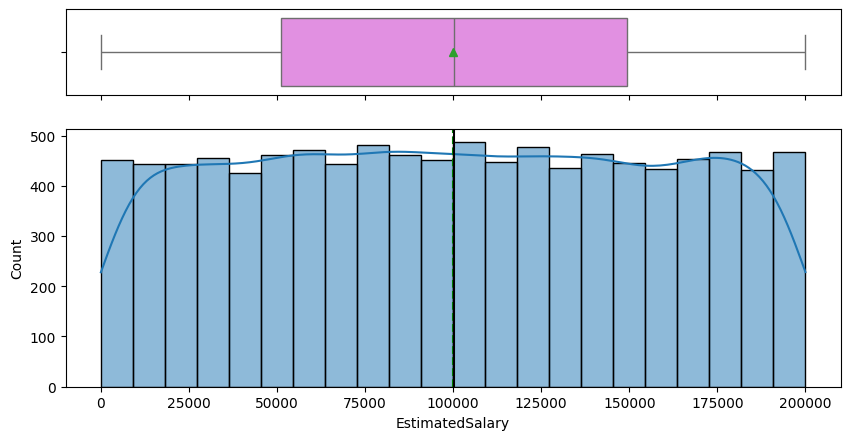

In [132]:
# Checking the estimated salary:
histogram_boxplot(df2,'EstimatedSalary', figsize=(10,5), discrete=False, kde=True)

- *The estimated salary has uniform distribution with average 100000 units of currency.*

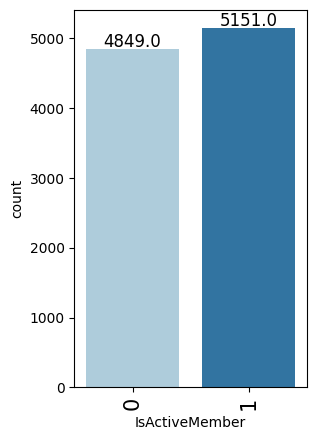

IsActiveMember
1    0.5151
0    0.4849
Name: proportion, dtype: float64

In [133]:
# Checking the  the number of the customer have a credit card or not:
labeled_barplot(df2, 'IsActiveMember')
df2['IsActiveMember'].value_counts(normalize=True)

- *51% of customers are active.*

### Bitivariate analysis

**Let's check some bivariate relationships with Exited variables**

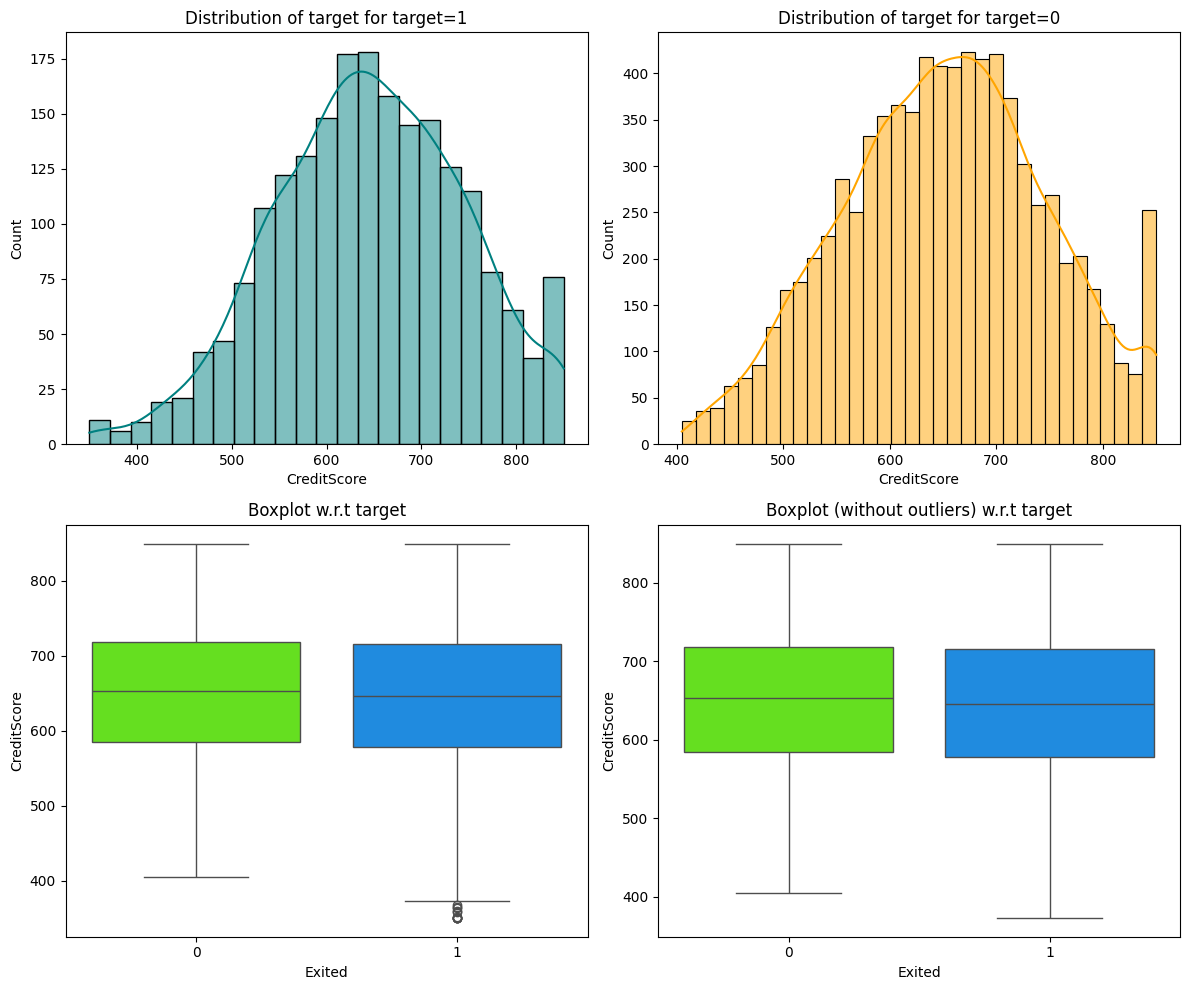

In [134]:
# Checking customer's CreditScore and exited status
distribution_plot_wrt_target(df2, "CreditScore", "Exited")

- *The average credit score for existing and exited customers is almost the same ~650.*
- *The lower and upper boundaries are the same except for some outliers for the exited customers.*

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


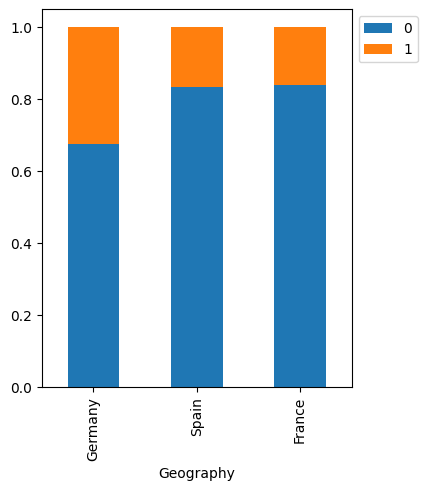

In [135]:
# Checking customer's geography and exited status
stacked_barplot(df2, "Geography", "Exited")

- *Most of exited customers are from Germany.*
- *Spain and France locations contain the same relative amount of customers.*

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


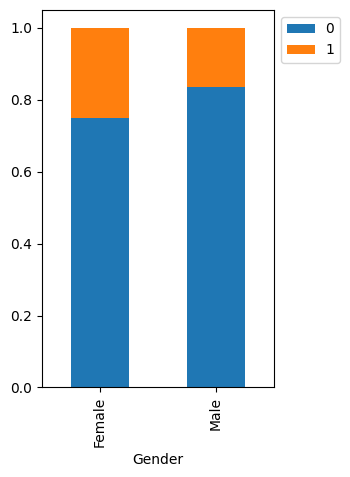

In [136]:
# Checking customer's gender and exited status
stacked_barplot(df2, "Gender", "Exited")

- *Most of the exited customers are female but not strongly expressed.*

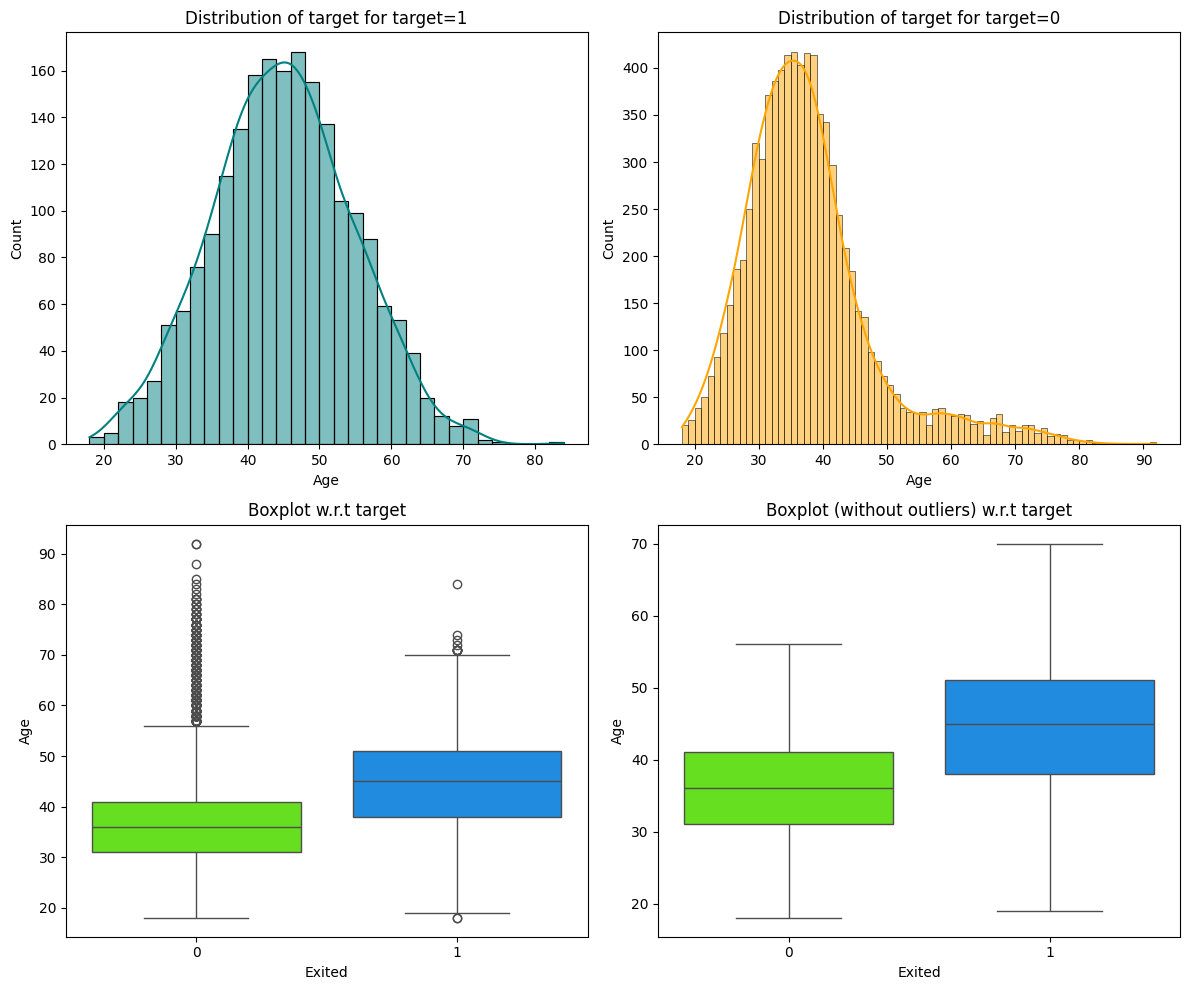

In [137]:
# Checking customer's age and exited status
distribution_plot_wrt_target(df2, "Age", "Exited")

- *The average age of the exited customers is 45 years and is higher than existing on 10 years.*
- *Some outliers depict some senior customers aged up to 90 years.*

<Axes: xlabel='Exited', ylabel='Tenure'>

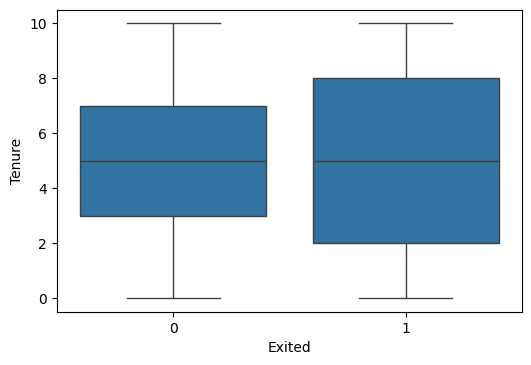

In [138]:
# Checking customer's number of years for which the customer has been with the bank and exited status
sns.boxplot(df2, x = "Exited", y = "Tenure")

- *The average tenure number for existing and exited customers is the same - 5 years.*

<Axes: xlabel='NumOfProducts', ylabel='count'>

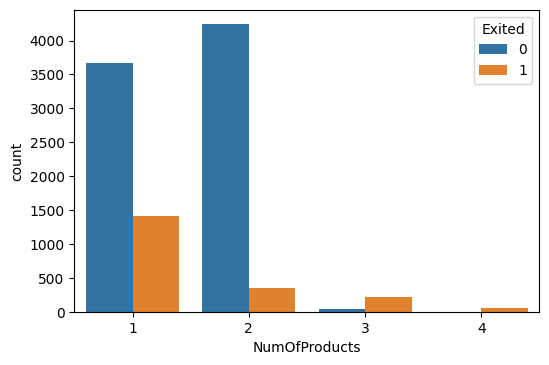

In [139]:
# Checking customer's number of products that a customer has purchased through the bank and exited status
sns.countplot(df2,  x="NumOfProducts", hue="Exited")

- *Most of the exited customers have 1 numbers of the bank products.*
- *Most of the existingcustomers have 1 and 2 numbers of the bank products.*

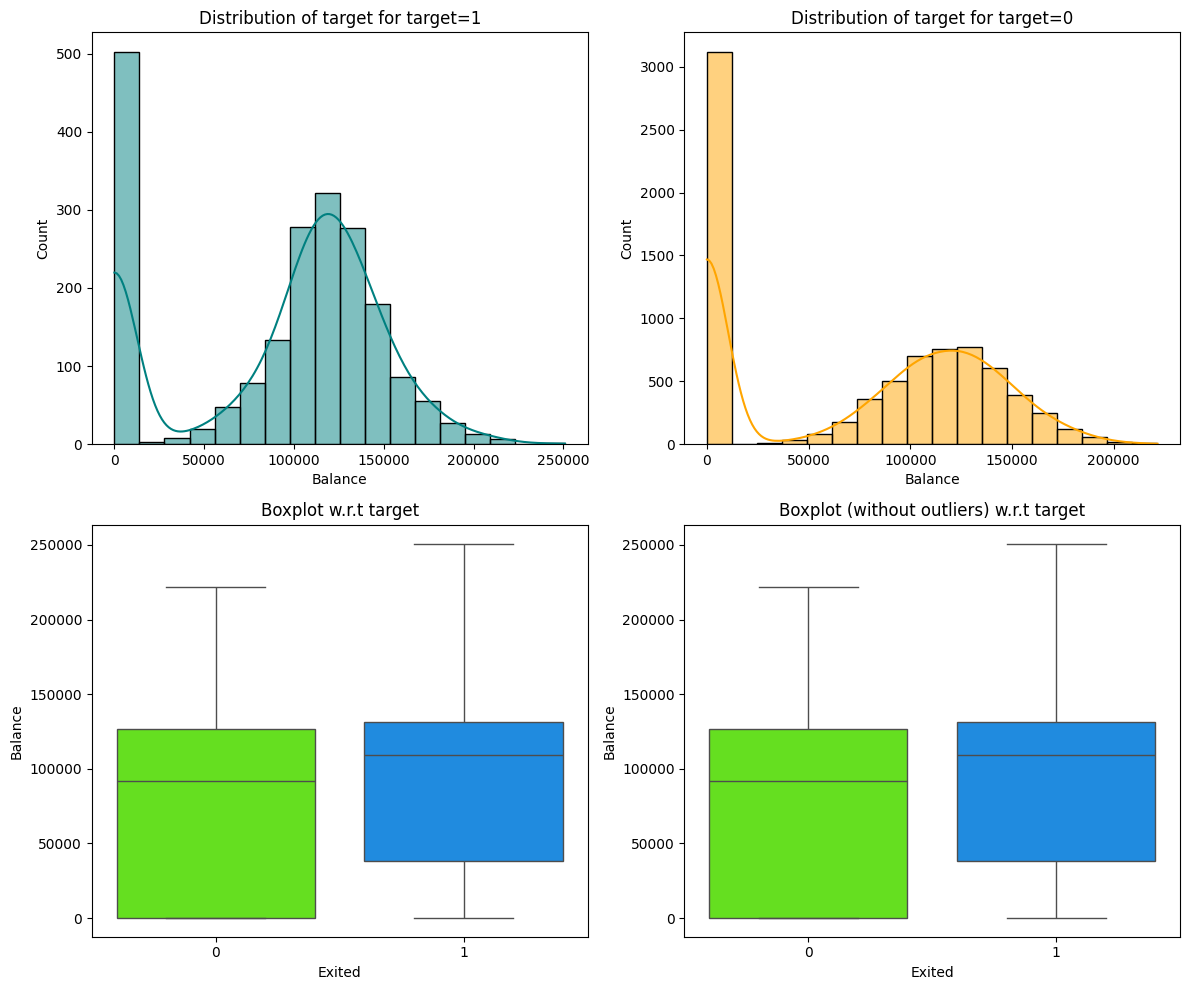

In [140]:
# Checking customer's account balance and exited status
distribution_plot_wrt_target(df2, "Balance", "Exited")

- *The average account balance is 120000, the spike shows 0 balance for 500 existing customers.*
- *The spike shows 0 balance for 3000 exited customers, some of exited customers still keep some balance on their accounts.*
- *The average account balance for existing customers is higher than for the exited.*

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


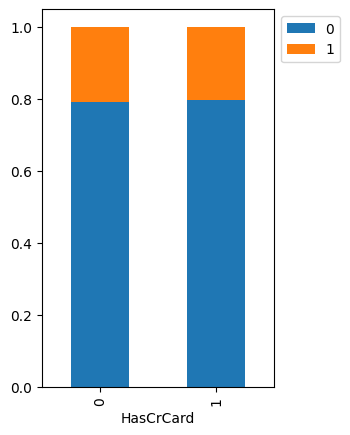

In [141]:
# Checking the customer owning a credit card and exited status
stacked_barplot(df2, "HasCrCard", "Exited")

- *The exited and existing customers have the same HasCRCard ratio of variables.*

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

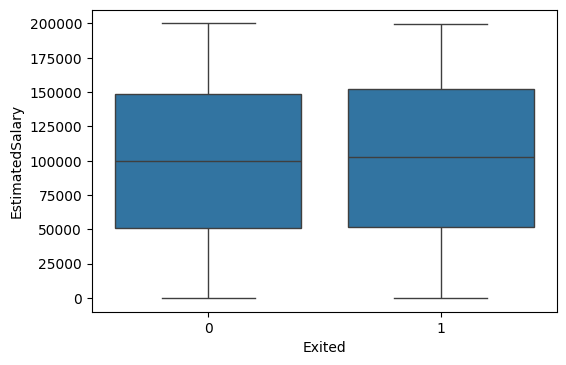

In [142]:
# Checking the customer's estimated salary and exited status
sns.boxplot(df2, x="Exited", y="EstimatedSalary")

- *The average estimated salary is almost the same for the existing and the exited customers - around 100000.*

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


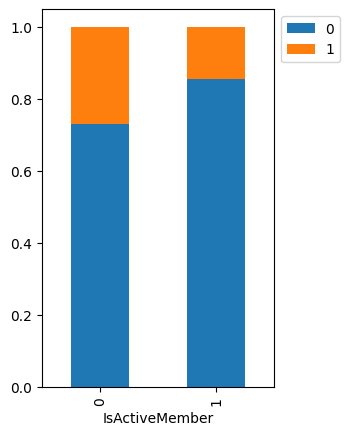

In [143]:
# Checking a categorical variable that decides whether the customer is an active member of the bank or not and exited status
stacked_barplot(df2, "IsActiveMember", "Exited")

- *4416 from 7963 exited customers shows InActive Member contributes ambiguity and needs to be corrected to not active if they are exited.*

### To jump back to the EDA quick observation section, click <a href = #link2>here</a>.